In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train,y_train) , (X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [6]:
X_train.shape

(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
single_image = X_train[0]

In [10]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [24]:
single_image.max()

255

In [25]:
single_image.min()

0

In [11]:
single_image.shape

(28, 28)

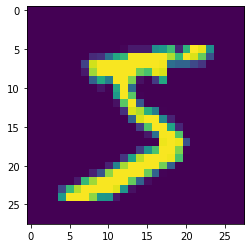

In [12]:
plt.imshow(single_image) # looks like number '5' ,  but it doesn't look line grayscale because of the default cmap being set to 'viridis'

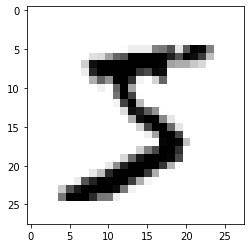

In [14]:
plt.imshow(single_image , cmap='binary')

In [15]:
y_train # this is categorical not continous ,  5 means image of number 5 

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_train.shape

(60000,)

In [18]:
y_example = to_categorical(y_train)

In [19]:
y_example.shape

(60000, 10)

In [20]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [21]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [22]:
y_cat_test = to_categorical(y_test,num_classes=10) # num_classes fixes the number of categories

In [23]:
y_cat_train = to_categorical(y_train,num_classes=10) # num_classes fixes the number of categories

In [26]:
X_train = X_train/255
X_test = X_test/255
# we can do this because we know that all the values in test and train will lie between 0 and 255

In [27]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [28]:
X_train[0].max()

1.0

In [29]:
X_train[0].min()

0.0

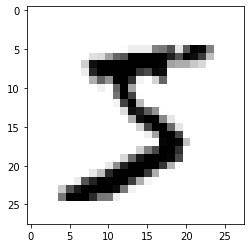

In [31]:
plt.imshow(X_train[0] , cmap='binary')

In [32]:
X_train.shape

(60000, 28, 28)

In [33]:
# batch_size , width , height , color_channel(s)
X_train = X_train.reshape(60000,28,28,1)

In [34]:
X_test = X_test.reshape(10000,28,28,1)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [38]:
model = Sequential()

In [39]:
model.add(Conv2D(filters=32 , kernel_size = (4,4) , input_shape = (28,28,1) , activation = 'relu' )) # Convolution layer
model.add(MaxPool2D(pool_size = (2,2))) # Pooling layer
model.add(Flatten()) # Flattening layer so that our image gets trasformed into an 784X1 array
model.add(Dense(128,activation='relu')) # Final Dense layer

model.add(Dense(10,activation = 'softmax')) # OUTPUT LAYER FOR MULTI-CLASS CLASSIFICATION

model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
early_stop = EarlyStopping(monitor = 'val_loss' , patience=1)

In [42]:
model.fit(x = X_train , y = y_cat_train , epochs = 10 , validation_data=(X_test,y_cat_test) , callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 24s 12ms/step - loss: 0.1380 - accuracy: 0.9581 - val_loss: 0.0614 - val_accuracy: 0.9806
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0465 - accuracy: 0.9856 - val_loss: 0.0377 - val_accuracy: 0.9876
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0296 - accuracy: 0.9908 - val_loss: 0.0368 - val_accuracy: 0.9883
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0199 - accuracy: 0.9939 - val_loss: 0.0366 - val_accuracy: 0.9869
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0148 - accuracy: 0.9952 - val_loss: 0.0405 - val_accuracy: 0.9876


In [43]:
metrics = pd.DataFrame(model.history.history)

In [44]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.137956,0.958067,0.061414,0.9806
1,0.046491,0.985617,0.037745,0.9876
2,0.029589,0.990750,0.036826,0.9883
3,0.019870,0.993867,0.036599,0.9869
4,0.014848,0.995200,0.040463,0.9876


<AxesSubplot:>

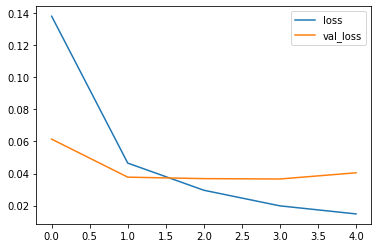

In [47]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

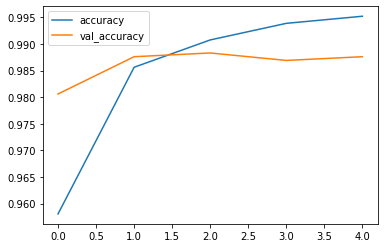

In [48]:
metrics[['accuracy','val_accuracy']].plot()

In [49]:
model.metrics_names

['loss', 'accuracy']

In [52]:
model.evaluate(X_test,y_cat_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0405 - accuracy: 0.9876


[0.0404629185795784, 0.9876000285148621]

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
model_pred = model.predict_classes(X_test)

C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [55]:
print(classification_report(y_test , model_pred)) # we won't use pred_cat_test because the output of model_pred is no longer in an array form

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [56]:
print(confusion_matrix(y_test , model_pred))

[[ 978    0    1    0    0    0    0    0    0    1]
 [   1 1128    1    1    0    1    3    0    0    0]
 [   2    1 1021    0    1    0    1    5    1    0]
 [   0    0    9  994    0    3    0    1    2    1]
 [   1    0    0    0  975    0    2    0    0    4]
 [   3    0    0    7    0  875    6    0    1    0]
 [   6    1    0    0    1    0  948    0    2    0]
 [   1    2    6    1    0    0    0 1013    1    4]
 [   5    1    3    0    1    1    1    4  952    6]
 [   1    1    0    1    5    2    0    4    3  992]]


<AxesSubplot:>

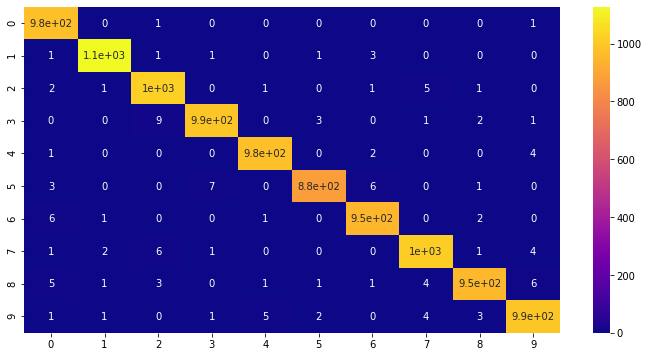

In [58]:
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test , model_pred) , annot=True , cmap='plasma')

In [59]:
my_number = X_test[0].reshape(28,28)

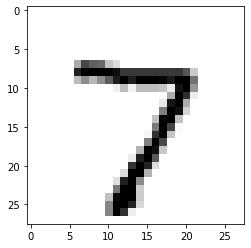

In [61]:
plt.imshow(my_number , cmap='binary')

In [63]:
# batch_size , width , height , color_channel
model.predict_classes(my_number.reshape(1,28,28,1))

C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7], dtype=int64)

In [70]:
test = pd.read_csv('test.csv')

In [71]:
len(test)

28000

In [78]:
test = test/255

In [80]:
test = test.values

In [81]:
test.shape

(28000, 784)

In [82]:
test = test.reshape(28000,28,28,1)

In [83]:
cnn_pred = model.predict_classes(test)

C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [84]:
cnn_pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [86]:
output = pd.DataFrame( {'ImageId': np.arange(1,28001) , 'Label': pd.Series(cnn_pred)})
output.to_csv('MNIST_pred.csv')